
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Ramiro Castagnola

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


In [1]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML
import scipy.signal as signal

N  = 1000 # muestras
fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################
def Rectangular (N,x):
    
    ventana = signal.boxcar(N)
    
    salida = np.multiply(x,ventana)

    return salida

def Bartlett (N,x):
    
    ventana = signal.bartlett(N)
    
    salida = np.multiply(x,ventana)

    return salida

def Hann (N,x):
    
    ventana = signal.windows.hann(N)
    
    salida = np.multiply(x,ventana)

    return salida

def Blackman (N,x):
    
    ventana = signal.blackman(N)
    
    salida = np.multiply(x,ventana)

    return salida

def Flattop (N,x):
    
    ventana = signal.flattop(N)
    
    salida = np.multiply(x,ventana)

    return salida

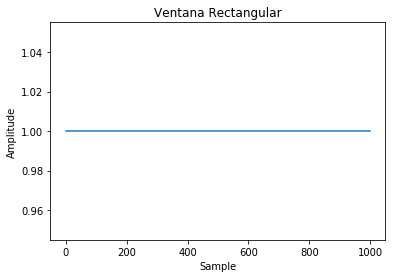

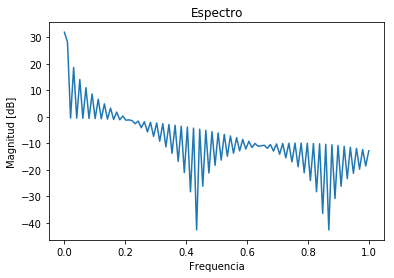

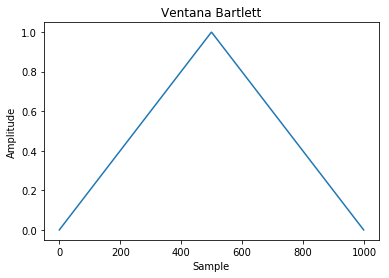

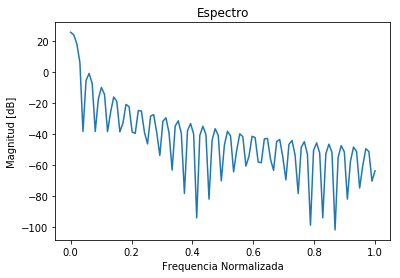

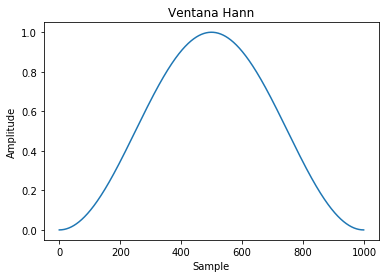

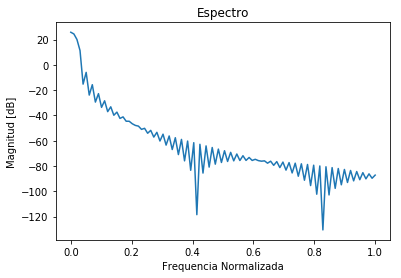

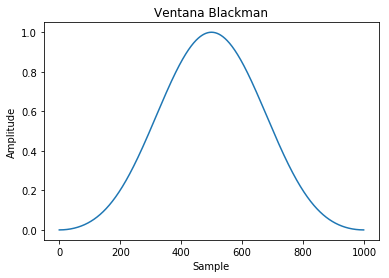

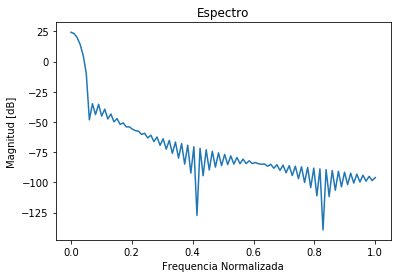

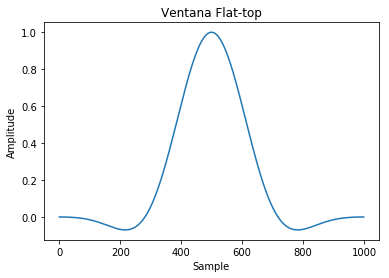

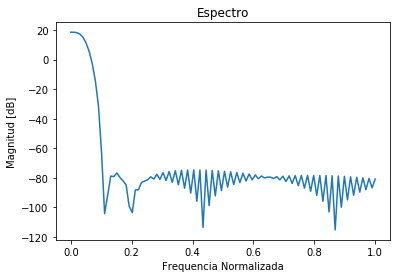

In [2]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
señal = 1

rectangularEj1 = Rectangular(N,señal)
bartlettEj1 = Bartlett(N,señal)
hannEj1     = Hann(N,señal)
blackmanEj1 = Blackman(N,señal)
flattopEj1  = Flattop(N,señal)

sp0Ej1 = np.fft.fft(rectangularEj1,2048)/25.5
sp1Ej1 = np.fft.fft(bartlettEj1,2048)/25.5
sp2Ej1 = np.fft.fft(hannEj1,2048)/25.5
sp3Ej1 = np.fft.fft(blackmanEj1,2048)/25.5
sp4Ej1 = np.fft.fft(flattopEj1,2048)/25.5

freq = np.linspace(0, 1, 100)

plt.title('Ventana Rectangular' )
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(rectangularEj1)
plt.show()
plt.title('Espectro' )
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frequencia")
plt.plot(freq, 20*np.log10(np.absolute(sp0Ej1)[0:100]))
plt.show()

plt.title('Ventana Bartlett' )
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(bartlettEj1)
plt.show()
plt.title('Espectro' )
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frequencia Normalizada")
plt.plot(freq, 20*np.log10(np.absolute(sp1Ej1)[0:100]))
plt.show()

plt.title('Ventana Hann' )
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(hannEj1)
plt.show()
plt.title('Espectro' )
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frequencia Normalizada")
plt.plot(freq, 20*np.log10(np.absolute(sp2Ej1)[0:100]))
plt.show()

plt.title('Ventana Blackman' )
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(blackmanEj1)
plt.show()
plt.title('Espectro' )
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frequencia Normalizada")
plt.plot(freq, 20*np.log10(np.absolute(sp3Ej1)[0:100]))
plt.show()

plt.title('Ventana Flat-top' )
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(flattopEj1)
plt.show()
plt.title('Espectro' )
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frequencia Normalizada")
plt.plot(freq, 20*np.log10(np.absolute(sp4Ej1)[0:100]))
plt.show()


b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [19]:
#######################################
# Tu simulación que genere resultados #
#######################################
maxi0 = max(20*np.log10(np.absolute(sp0Ej1[2:1024])))
maxi1 = max(20*np.log10(np.absolute(sp1Ej1[4:1024])))
maxi2 = max(20*np.log10(np.absolute(sp2Ej1[5:1024])))
maxi3 = max(20*np.log10(np.absolute(sp3Ej1[6:1024])))
maxi4 = max(20*np.log10(np.absolute(sp4Ej1[11:1024])))

tus_resultados = [ 
                   ['4.39e-04*FS', maxi0], # <-- acá debería haber numeritos :)
                   ['6.34e-04*FS', maxi1], # <-- acá debería haber numeritos :)
                   ['7.32e-04*FS', maxi2], # <-- acá debería haber numeritos :)
                   ['8.30e-04*FS', maxi3], # <-- acá debería haber numeritos :)
                   ['18.55e-04*FS', maxi4] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,4.39e-04*FS,18.557318
Bartlett,6.34e-04*FS,-0.775524
Hann,7.32e-04*FS,-5.897426
Blackman,8.30e-04*FS,-34.867055
Flat-top,18.55e-04*FS,-74.597881


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

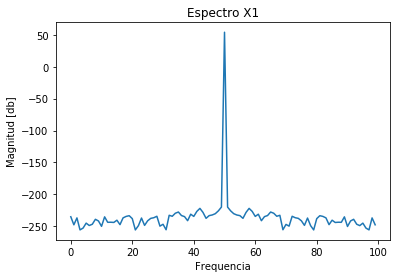

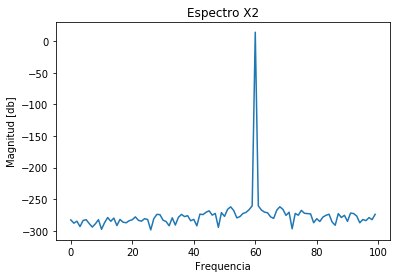

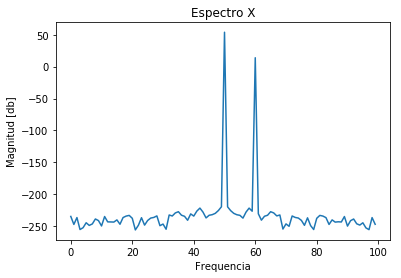

In [4]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib.pylab as plt
import scipy.signal as signal
import scipy.integrate as integrate
import statistics as stats


N = 1000
fs = 1000
a2Ej2 = 10**(-40/20)


tt = np.linspace (0,((N-1)*(1/fs)),N)

O1Ej2 = 2*np.pi*(fs/4)
O2Ej2 = O1Ej2 + 10*2*np.pi

x1Ej2 = np.sin(O1Ej2*tt)

x2Ej2 = a2Ej2*np.sin(O2Ej2*tt)

xEj2 = x1Ej2 + x2Ej2


sp1Ej2 = np.fft.fft(x1Ej2)
plt.title('Espectro X1' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp1Ej2)[200:300]))
plt.show()


sp2Ej2 = np.fft.fft(x2Ej2)
plt.title('Espectro X2' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp2Ej2)[200:300]))
plt.show()


sp3Ej2 = np.fft.fft(xEj2)
plt.title('Espectro X' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp3Ej2)[200:300]))
plt.show()


<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Realizando una iteración de valores, se comprueba que aproximadamente se requiere una amplitud de -300 db en "a2" o menor para eliminar totalmente la señal X2 del espectro.
</div>

In [5]:
AmplitudEj2 = [50,100,150,200,250,300,350,400]

ArrayEj2 = np.array([AmplitudEj2])

AmpEj2 = 10**(-ArrayEj2/20)

x2BEj2 = AmpEj2.T*np.sin(O2Ej2*tt)

xBEj2 = x1Ej2 + x2BEj2

sp4Ej2 = np.fft.fft(xBEj2)

tus_resultados = [ 
                   20*np.log10(np.absolute(sp4Ej2[0,])[260]),
                   20*np.log10(np.absolute(sp4Ej2[1,])[260]), 
                   20*np.log10(np.absolute(sp4Ej2[2,])[260]), 
                   20*np.log10(np.absolute(sp4Ej2[3,])[260]), 
                   20*np.log10(np.absolute(sp4Ej2[4,])[260]), 
                   20*np.log10(np.absolute(sp4Ej2[5,])[260]),
                   20*np.log10(np.absolute(sp4Ej2[6,])[260]),
                   20*np.log10(np.absolute(sp4Ej2[7,])[260]) 
                 ]
df = DataFrame(tus_resultados, columns=['X2 (dB)'],
               index=[  
                        '-50 db',
                        '-100 db',
                        '-150 db',
                        '-200 db',
                        '-250 db',
                        '-300 db',
                        '-350 db',
                        '-400 db',
                     ])
HTML(df.to_html())

,X2 (dB)
-50 db,3.979400
-100 db,-46.020600
-150 db,-96.020599
-200 db,-146.020317
-250 db,-195.931857
-300 db,-232.661496
-350 db,-234.477064
-400 db,-234.480184


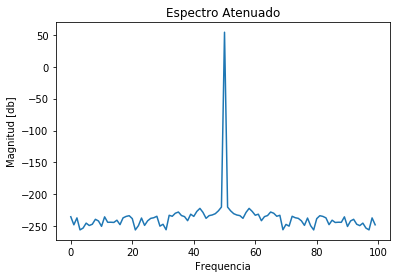

In [6]:
plt.title('Espectro Atenuado' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp4Ej2[5,])[200:300]))
plt.show()

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al implementar un piso de ruido, lo que se genera es que el factor de escala para que X2 no se aprecie en el espectro sera menor.
</div>

<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

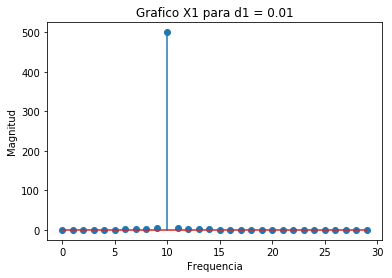

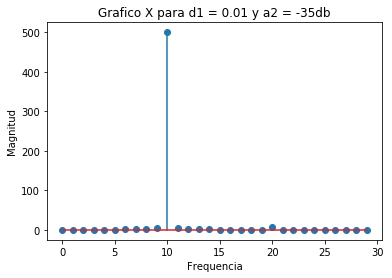

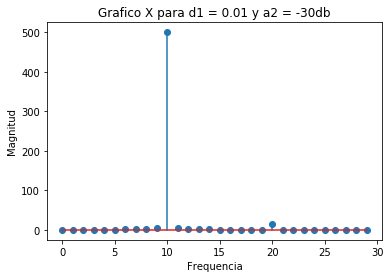

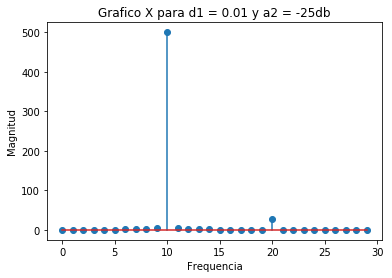

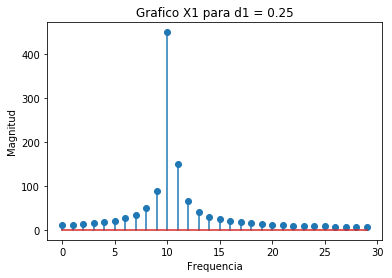

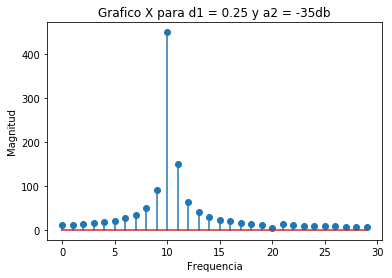

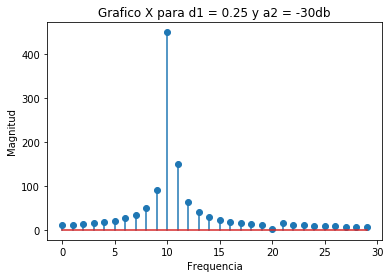

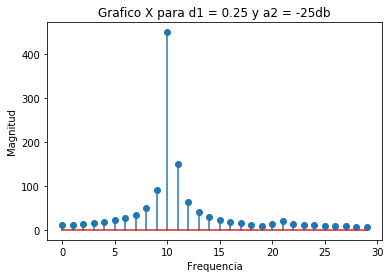

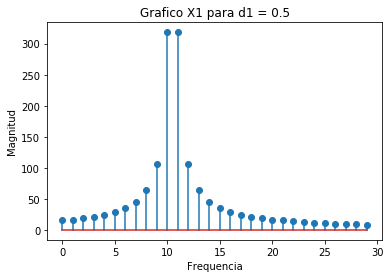

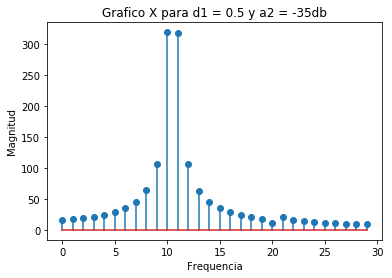

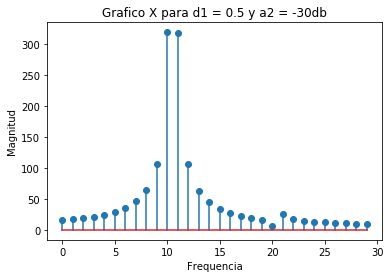

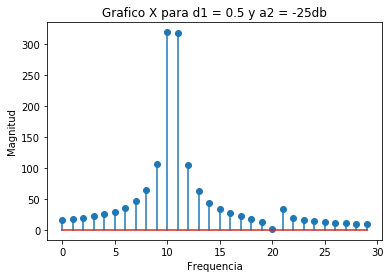

,$a_2$ (dB)
leve,-35db
moderada,-25db
máxima,-35db


In [7]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib.pylab as plt
import scipy.signal as signal
import scipy.integrate as integrate
import statistics as stats

N = 1000
fs = 1000
a2AEj2c = 10**(-35/20)
a2BEj2c = 10**(-30/20)
a2CEj2c = 10**(-25/20)

tt = np.linspace (0,((N-1)*(1/fs)),N)

d1Ej2c = [0.01,0.25,0.5] 

aEj2c = np.array([d1Ej2c])

O1Ej2c = 2*np.pi*(fs/4) + aEj2c*2*np.pi
O2Ej2c = O1Ej2c + 10 *2*np.pi

x1Ej2c = np.sin(O1Ej2c.T*tt)

x2AEj2c = a2AEj2c*np.sin(O2Ej2c.T*tt)
x2BEj2c = a2BEj2c*np.sin(O2Ej2c.T*tt)
x2CEj2c = a2CEj2c*np.sin(O2Ej2c.T*tt)

xAEj2c = x1Ej2c + x2AEj2c
xBEj2c = x1Ej2c + x2BEj2c
xCEj2c = x1Ej2c + x2CEj2c

spAEj2c = np.fft.fft(xAEj2c)
spBEj2c = np.fft.fft(xBEj2c)
spCEj2c = np.fft.fft(xCEj2c)

sp1Ej2c = np.fft.fft(x1Ej2c) 

plt.title('Grafico X1 para d1 = 0.01' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(sp1Ej2c[0,])[240:270])
plt.show()

plt.title('Grafico X para d1 = 0.01 y a2 = -35db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(spAEj2c[0,])[240:270])
plt.show()
plt.title('Grafico X para d1 = 0.01 y a2 = -30db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(spBEj2c[0,])[240:270])
plt.show()
plt.title('Grafico X para d1 = 0.01 y a2 = -25db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(spCEj2c[0,])[240:270])
plt.show()

plt.title('Grafico X1 para d1 = 0.25' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(sp1Ej2c[1,])[240:270])
plt.show()

plt.title('Grafico X para d1 = 0.25 y a2 = -35db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(spAEj2c[1,])[240:270])
plt.show()
plt.title('Grafico X para d1 = 0.25 y a2 = -30db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(spBEj2c[1,])[240:270])
plt.show()
plt.title('Grafico X para d1 = 0.25 y a2 = -25db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(spCEj2c[1,])[240:270])
plt.show()


plt.title('Grafico X1 para d1 = 0.5' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(sp1Ej2c[2,])[240:270])
plt.show()

plt.title('Grafico X para d1 = 0.5 y a2 = -35db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(spAEj2c[2,])[240:270])
plt.show()
plt.title('Grafico X para d1 = 0.5 y a2 = -30db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(spBEj2c[2,])[240:270])
plt.show()
plt.title('Grafico X para d1 = 0.5 y a2 = -25db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem(np.absolute(spCEj2c[2,])[240:270])
plt.show()







#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '-35db', # <-- acá debería haber numeritos :)
                   '-25db', # <-- acá debería haber numeritos :)
                   '-35db' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

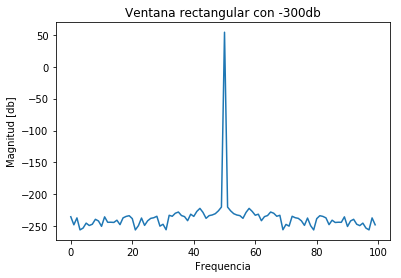

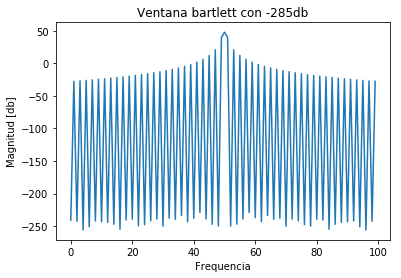

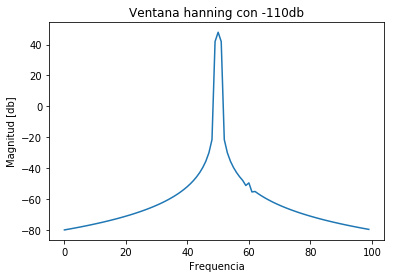

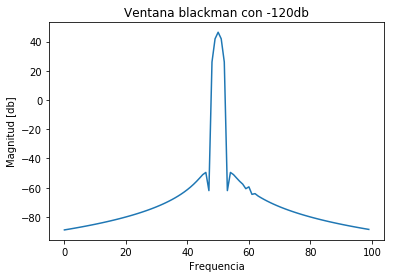

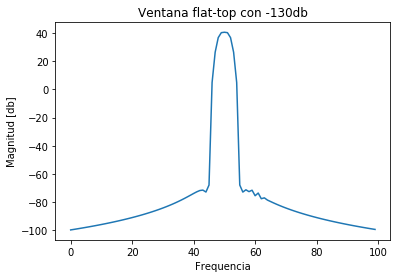

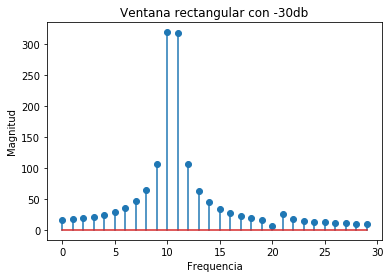

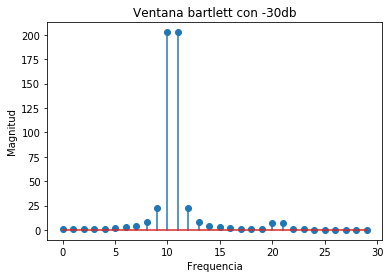

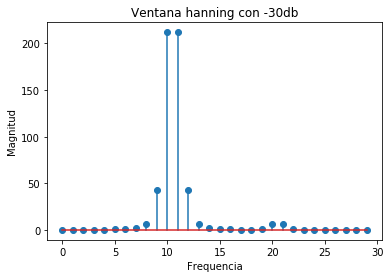

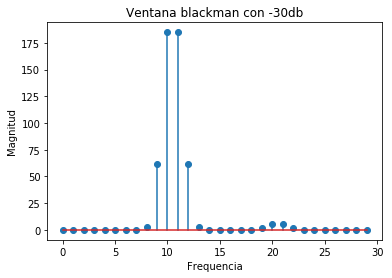

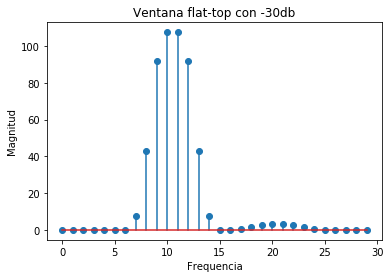

In [8]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N = 1000
fs = 1000
tt = np.linspace (0,((N-1)*(1/fs)),N)

################################################
AmplitudBEj2D = [110,120,130,285,300]

ArrayBEj2D = np.array([AmplitudBEj2D])

a2BEj2D = 10**(-ArrayBEj2D/20)
O1BEj2D = 2*np.pi*(fs/4)
O2BEj2D = O1BEj2D + 10*2*np.pi

x1BEj2D = np.sin(O1BEj2D*tt)

x2BEj2D = a2BEj2D.T*np.sin(O2BEj2D*tt)

xBEj2D = x1BEj2D + x2BEj2D
#################################################
AmplitudCEj2D = [30,20,30,35]

ArrayCEj2D = np.array([AmplitudCEj2D])

a2CEj2D = 10**(-ArrayCEj2D/20)
O1CEj2D = 2*np.pi*(fs/4) + 0.5*2*np.pi
O2CEj2D = O1CEj2D + 10 *2*np.pi

x1CEj2D = np.sin(O1CEj2D*tt)

x2CEj2D = a2CEj2D.T*np.sin(O2CEj2D*tt)

xCEj2D = x1CEj2D + x2CEj2D
#################################################

rectangularBEj2D = Rectangular(N,xBEj2D)
bartlettBEj2D = Bartlett(N,xBEj2D)
hannBEj2D     = Hann(N,xBEj2D)
blackmanBEj2D = Blackman(N,xBEj2D)
flattopBEj2D  = Flattop(N,xBEj2D)

sp0BEj2D = np.fft.fft(rectangularBEj2D)
sp1BEj2D = np.fft.fft(bartlettBEj2D)
sp2BEj2D = np.fft.fft(hannBEj2D)
sp3BEj2D = np.fft.fft(blackmanBEj2D)
sp4BEj2D = np.fft.fft(flattopBEj2D)

plt.title('Ventana rectangular con -300db' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp0BEj2D[4,])[200:300]))
plt.show()

plt.title('Ventana bartlett con -285db' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp1BEj2D[3,])[200:300]))
plt.show()

plt.title('Ventana hanning con -110db' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp2BEj2D[0,])[200:300]))
plt.show()

plt.title('Ventana blackman con -120db' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp3BEj2D[1,])[200:300]))
plt.show()

plt.title('Ventana flat-top con -130db' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp4BEj2D[2,])[200:300]))
plt.show()
###################################################
rectangularCEj2D = Rectangular(N,xCEj2D)
bartlettCEj2D = Bartlett(N,xCEj2D)
hannCEj2D     = Hann(N,xCEj2D)
blackmanCEj2D = Blackman(N,xCEj2D)
flattopCEj2D  = Flattop(N,xCEj2D)

sp0CEj2D = np.fft.fft(rectangularCEj2D)
sp1CEj2D = np.fft.fft(bartlettCEj2D)
sp2CEj2D = np.fft.fft(hannCEj2D)
sp3CEj2D = np.fft.fft(blackmanCEj2D)
sp4CEj2D = np.fft.fft(flattopCEj2D)

plt.title('Ventana rectangular con -30db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem((np.absolute(sp0CEj2D[0,])[240:270]))
plt.show()

plt.title('Ventana bartlett con -30db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem((np.absolute(sp1CEj2D[0,])[240:270]))
plt.show()

plt.title('Ventana hanning con -30db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem((np.absolute(sp2CEj2D[0,])[240:270]))
plt.show()

plt.title('Ventana blackman con -30db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem((np.absolute(sp3CEj2D[0,])[240:270]))
plt.show()

plt.title('Ventana flat-top con -30db' )
plt.ylabel("Magnitud")
plt.xlabel("Frequencia")
plt.stem((np.absolute(sp4CEj2D[0,])[240:270]))
plt.show()



In [9]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['-300db', '-35db'], # <-- acá debería haber numeritos :)
                   ['-285db', '-30db'], # <-- acá debería haber numeritos :)
                   ['-110db', '-30db'], # <-- acá debería haber numeritos :)
                   ['-120db', '-30db'], # <-- acá debería haber numeritos :)
                   ['-130db', '-30db'] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,-300db,-35db
Bartlett,-285db,-30db
Hann,-110db,-30db
Blackman,-120db,-30db
Flat-top,-130db,-30db


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

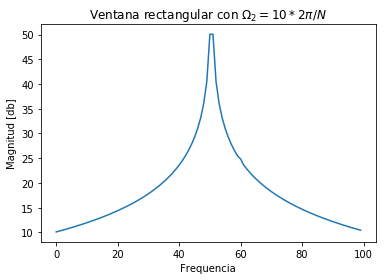

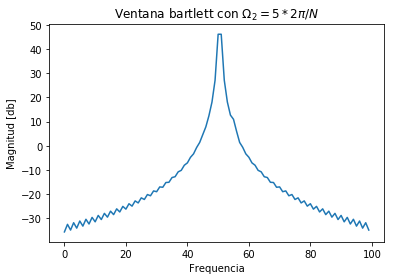

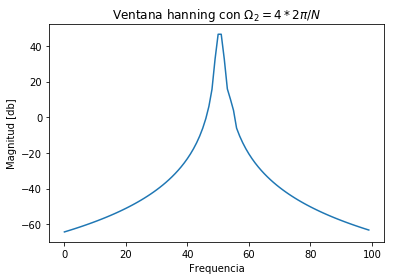

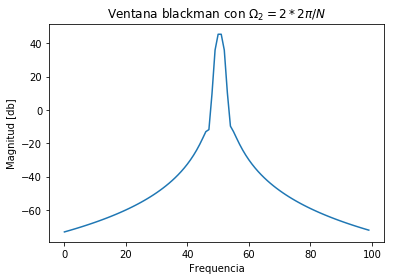

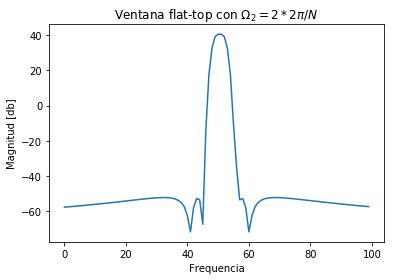

,$\Omega_0$ (#)
Rectangular,10* $2\pi/N$
Bartlett,5* $2\pi/N$
Hann,4* $2\pi/N$
Blackman,2* $2\pi/N$
Flat-top,2* $2\pi/N$


In [42]:
#######################################
# Tu simulación que genere resultados #
#######################################
a2Ej2E = 10**(-40/20)
VectorEj2E = [1,2,3,4,5,6,7,8,9,10]

VectEj2E = np.array([VectorEj2E])

O1Ej2E = 2*np.pi*(fs/4) + 0.5*2*np.pi
O2Ej2E = 2*np.pi*(fs/4) + VectEj2E*2*np.pi


x1Ej2E = np.sin(O1Ej2E*tt)

x2Ej2E = a2Ej2E*np.sin(O2Ej2E.T*tt)

xEj2E = x1Ej2E + x2Ej2E

rectangularEj2E = Rectangular(N,xEj2E)
bartlettEj2E = Bartlett(N,xEj2E)
hannEj2E     = Hann(N,xEj2E)
blackmanEj2E = Blackman(N,xEj2E)
flattopEj2E  = Flattop(N,xEj2E)

sp0Ej2E = np.fft.fft(rectangularEj2E)
sp1Ej2E = np.fft.fft(bartlettEj2E)
sp2Ej2E = np.fft.fft(hannEj2E)
sp3Ej2E = np.fft.fft(blackmanEj2E)
sp4Ej2E = np.fft.fft(flattopEj2E)

plt.title('Ventana rectangular con $\Omega_2 = 10* 2\pi/N$' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp0Ej2E[9,])[200:300]))
plt.show()

plt.title('Ventana bartlett con $\Omega_2 = 5* 2\pi/N$' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp1Ej2E[4,])[200:300]))
plt.show()

plt.title('Ventana hanning con $\Omega_2 = 4* 2\pi/N$' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp2Ej2E[3,])[200:300]))
plt.show()

plt.title('Ventana blackman con $\Omega_2 = 2* 2\pi/N$' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp3Ej2E[1,])[200:300]))
plt.show()

plt.title('Ventana flat-top con $\Omega_2 = 2* 2\pi/N$' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp4Ej2E[1,])[200:300]))
plt.show()

tus_resultados = [ 
                   '10* $2\pi/N$', # <-- acá debería haber numeritos :)
                   '5* $2\pi/N$', # <-- acá debería haber numeritos :)
                   '4* $2\pi/N$', # <-- acá debería haber numeritos :)
                   '2* $2\pi/N$', # <-- acá debería haber numeritos :)
                   '2* $2\pi/N$' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

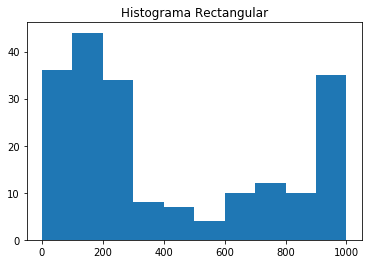

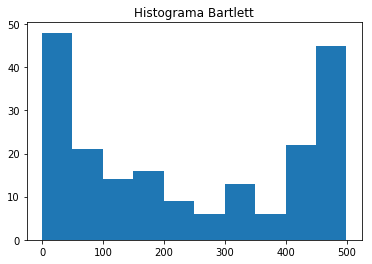

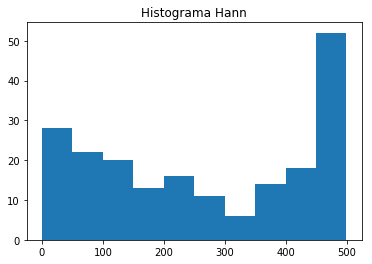

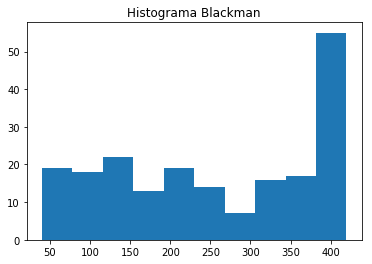

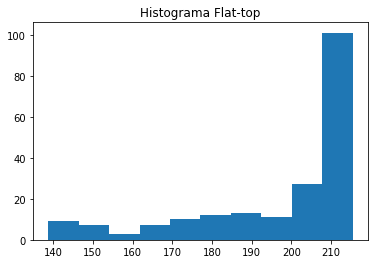

In [11]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib.pylab as plt
import scipy.signal as signal
import statistics as stats

N = 1000
fs = 1000
a0Ej3 = 2

tt = np.linspace (0,((N-1)*(1/fs)),N)

frEj3 = np.random.uniform(-2, 2, 200)

O0Ej3 = 2*np.pi*(fs/4)
O1Ej3 = O0Ej3 + frEj3 *2*np.pi

aEj3 = np.array([O1Ej3])

bEj3 = np.array([tt])

pEj3 = aEj3.T * bEj3

señalEj3 = a0Ej3*np.sin(pEj3)

rectangularEj3 = Rectangular(N,señalEj3)
bartlettEj3 = Bartlett(N,señalEj3)
hannEj3     = Hann(N,señalEj3)
blackmanEj3 = Blackman(N,señalEj3)
flattopEj3  = Flattop(N,señalEj3)

sp0Ej3 = np.fft.fft(rectangularEj3)
sp1Ej3 = np.fft.fft(bartlettEj3)
sp2Ej3 = np.fft.fft(hannEj3)
sp3Ej3 = np.fft.fft(blackmanEj3)
sp4Ej3 = np.fft.fft(flattopEj3)

abs0Ej3 = np.absolute(sp0Ej3)
abs1Ej3 = np.absolute(sp1Ej3)
abs2Ej3 = np.absolute(sp2Ej3)
abs3Ej3 = np.absolute(sp3Ej3)
abs4Ej3 = np.absolute(sp4Ej3)

Est0Ej3 = abs0Ej3.T[250,]
Est1Ej3 = abs1Ej3.T[250,]
Est2Ej3 = abs2Ej3.T[250,]
Est3Ej3 = abs3Ej3.T[250,]
Est4Ej3 = abs4Ej3.T[250,]

Esp0Ej3  = stats.median(Est0Ej3)
Esp1Ej3  = stats.median(Est1Ej3)
Esp2Ej3  = stats.median(Est2Ej3)
Esp3Ej3  = stats.median(Est3Ej3)
Esp4Ej3  = stats.median(Est4Ej3)

Sesgo0Ej3 = Esp0Ej3 - a0Ej3
Var0Ej3  = stats.variance(Est0Ej3)

Sesgo1Ej3 = Esp1Ej3 - a0Ej3
Var1Ej3  = stats.variance(Est1Ej3)

Sesgo2Ej3 = Esp2Ej3 - a0Ej3
Var2Ej3  = stats.variance(Est2Ej3)

Sesgo3Ej3 = Esp3Ej3 - a0Ej3
Var3Ej3  = stats.variance(Est3Ej3)

Sesgo4Ej3 = Esp4Ej3 - a0Ej3
Var4Ej3  = stats.variance(Est4Ej3)

plt.title('Histograma Rectangular' )
plt.hist(Est0Ej3)
plt.show()
plt.title('Histograma Bartlett' )
plt.hist(Est1Ej3)
plt.show()
plt.title('Histograma Hann' )
plt.hist(Est2Ej3)
plt.show()
plt.title('Histograma Blackman' )
plt.hist(Est3Ej3)
plt.show()
plt.title('Histograma Flat-top' )
plt.hist(Est4Ej3)
plt.show()

In [12]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [Sesgo0Ej3, Var0Ej3], # <-- acá debería haber numeritos :)
                   [Sesgo1Ej3, Var1Ej3], # <-- acá debería haber numeritos :)
                   [Sesgo2Ej3, Var2Ej3], # <-- acá debería haber numeritos :)
                   [Sesgo3Ej3, Var3Ej3], # <-- acá debería haber numeritos :)
                   [Sesgo4Ej3, Var4Ej3], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,211.898515,119605.460373
Bartlett,206.994738,34576.766091
Hann,253.794544,31100.636268
Blackman,252.067407,16776.804159
Flat-top,206.564075,473.633700


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

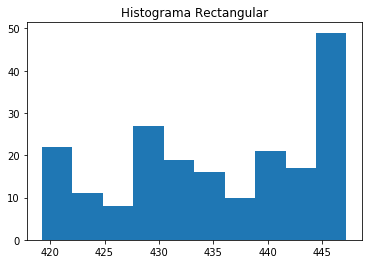

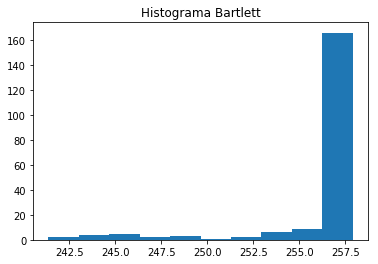

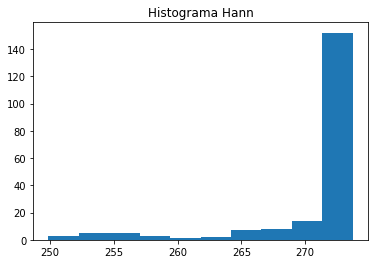

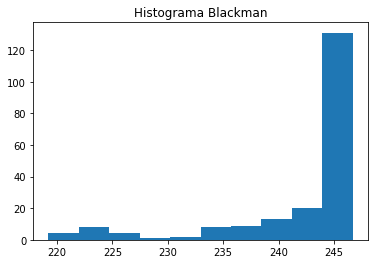

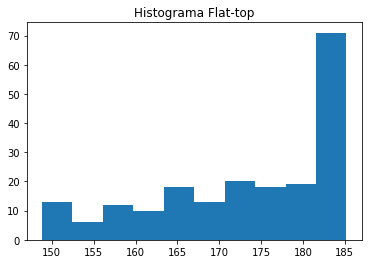

In [13]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
interA = O0Ej3 - 4*np.pi /N
interB = O0Ej3 + 4*np.pi /N

Est0BEj3 = abs0Ej3.T[248:253,]
Est1BEj3 = abs1Ej3.T[248:253,]
Est2BEj3 = abs2Ej3.T[248:253,]
Est3BEj3 = abs3Ej3.T[248:253,]
Est4BEj3 = abs4Ej3.T[248:253,]

Est0CUAEj3 = Est0BEj3**2
Est1CUAEj3 = Est1BEj3**2
Est2CUAEj3 = Est2BEj3**2
Est3CUAEj3 = Est3BEj3**2
Est4CUAEj3 = Est4BEj3**2

NewEst0Ej3 = (sum(Est0CUAEj3)/5)**(1/2)
NewEst1Ej3 = (sum(Est1CUAEj3)/5)**(1/2)
NewEst2Ej3 = (sum(Est2CUAEj3)/5)**(1/2)
NewEst3Ej3 = (sum(Est3CUAEj3)/5)**(1/2)
NewEst4Ej3 = (sum(Est4CUAEj3)/5)**(1/2)

Esp0BEj3  = stats.median(NewEst0Ej3)
Esp1BEj3  = stats.median(NewEst1Ej3)
Esp2BEj3  = stats.median(NewEst2Ej3)
Esp3BEj3  = stats.median(NewEst3Ej3)
Esp4BEj3  = stats.median(NewEst4Ej3)

Sesgo0BEj3 = Esp0BEj3 - a0Ej3
Var0BEj3  = stats.variance(NewEst0Ej3)

Sesgo1BEj3 = Esp1BEj3 - a0Ej3
Var1BEj3  = stats.variance(NewEst1Ej3)

Sesgo2BEj3 = Esp2BEj3 - a0Ej3
Var2BEj3  = stats.variance(NewEst2Ej3)

Sesgo3BEj3 = Esp3BEj3 - a0Ej3
Var3BEj3  = stats.variance(NewEst3Ej3)

Sesgo4BEj3 = Esp4BEj3 - a0Ej3
Var4BEj3  = stats.variance(NewEst4Ej3)

plt.title('Histograma Rectangular' )
plt.hist(NewEst0Ej3)
plt.show()
plt.title('Histograma Bartlett' )
plt.hist(NewEst1Ej3)
plt.show()
plt.title('Histograma Hann' )
plt.hist(NewEst2Ej3)
plt.show()
plt.title('Histograma Blackman' )
plt.hist(NewEst3Ej3)
plt.show()
plt.title('Histograma Flat-top' )
plt.hist(NewEst4Ej3)
plt.show()


In [14]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [Sesgo0BEj3, Var0BEj3], # <-- acá debería haber numeritos :)
                   [Sesgo1BEj3, Var1BEj3], # <-- acá debería haber numeritos :)
                   [Sesgo2BEj3, Var2BEj3], # <-- acá debería haber numeritos :)
                   [Sesgo3BEj3, Var3BEj3], # <-- acá debería haber numeritos :)
                   [Sesgo4BEj3, Var4BEj3], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,433.183958,81.514872
Bartlett,255.706401,11.951884
Hann,271.654141,29.761078
Blackman,244.094810,46.333070
Flat-top,173.806996,122.522651
